In [4]:
import numpy as np
import open3d
import matplotlib.pyplot as plt
import os
from numpy import linalg as LA

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [3]:
mainpath = '/p/home/jusers/cherepashkin1/jureca/cherepashkin1/phenoseed/598' 
cip = []
i=0
for root, directories, filenames in os.walk(mainpath): 
    for filename in filenames:
        if 'Surface.ply' in filename:
            cip.append(os.path.join(root,filename))

In [5]:
cip[0]

'/p/home/jusers/cherepashkin1/jureca/cherepashkin1/phenoseed/598/1484741/1495098_Surface.ply'

In [29]:
mimg = np.zeros([58014,3])
for i in range(len(cip)):
    pcd = open3d.io.read_point_cloud(cip[i])
    img = np.asarray(pcd.points)

    X = img[:, 0]
    Y = img[:, 1]
    Z = img[:, 2]
    C = np.zeros([3, 3])
    C[0, 0] = np.matmul(X, X.transpose())
    C[0, 1] = np.matmul(X, Y.transpose())
    C[0, 2] = np.matmul(X, Z.transpose())
    C[1, 0] = C[0, 1]
    C[1, 1] = np.matmul(Y, Y.transpose())
    C[1, 2] = np.matmul(Y, Z.transpose())
    C[2, 0] = C[0, 2]
    C[2, 1] = C[1, 2]
    C[2, 2] = np.matmul(Z, Z.transpose())
    w, v = LA.eig(C)
    img = np.matmul(v.transpose(), img.transpose()).transpose()
    img = img - np.mean(img,0)
    img = np.concatenate(
        (img, np.zeros([58014 - img.shape[0], 3])), axis=0)
    mimg = mimg + img 
mimg = mimg/len(cip)

In [32]:
img

array([[-18.63070166,  54.01200809,  -2.81046257],
       [-20.54494949,  50.36276217,  -2.6738631 ],
       [-19.88700758,  51.11504038,  -2.63936762],
       ...,
       [  0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ]])

In [31]:
mimg

array([[-2.68342319e+00,  9.96540728e+00, -3.57229850e+00],
       [-2.61216120e+00,  1.00566050e+01, -3.56369202e+00],
       [-2.54962385e+00,  1.01288849e+01, -3.57985555e+00],
       ...,
       [-4.61084443e-03,  1.68687093e-02, -1.31897118e-03],
       [-4.74741477e-03,  1.67539121e-02, -1.25572979e-03],
       [-4.65760297e-03,  1.70363741e-02, -1.11559755e-03]])

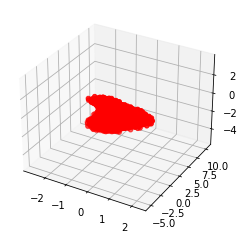

In [30]:
#plt.scatter()
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(mimg[:,0],mimg[:,1],mimg[:,2], c='r')

In [7]:
img.shape

(58014, 3)

# average on sampling

In [34]:
mainpath = '/p/home/jusers/cherepashkin1/jureca/cherepashkin1/phenoseed_csv/598csv9' 
cip = []
i=0
for root, directories, filenames in os.walk(mainpath): 
    for filename in filenames:
        if 'F_N.csv' in filename:
            cip.append(os.path.join(root,filename))

In [35]:
cip[0]

'/p/home/jusers/cherepashkin1/jureca/cherepashkin1/phenoseed_csv/598csv9/1484741/1495025_F_N.csv'

In [40]:
F_Na = np.zeros(441)
for i in range(len(cip)):
    F_N = np.genfromtxt(cip[i],delimiter=',')
    F_Na = F_N + F_Na
F_Na = F_Na/len(cip)

In [44]:
np.savetxt('F_Na.csv',F_Na,delimiter=',')

In [94]:
any([False,False,False])

False

In [103]:
np.uniuque(exception_list)

AttributeError: module 'numpy' has no attribute 'uniuque'

In [117]:
exception_list = []
F_Nm = np.zeros([len(cip)-len(exception_list),441])
j = 0
cip2 = []
for i in range(len(cip)):
    if not any(exception in cip[i] for exception in exception_list):
        F_Nm[j,:] = np.genfromtxt(cip[i],delimiter=',')
        cip2.append(cip[i])
        j+=1

In [118]:
F_Nm.shape

(5270, 441)

In [51]:
cip[1678]

'/p/home/jusers/cherepashkin1/jureca/cherepashkin1/phenoseed_csv/598csv9/1484722/1492640_F_N.csv'

In [58]:
print(cip[1678])
print(cip[2270])
print(cip[5027])
print(cip[3038])

/p/home/jusers/cherepashkin1/jureca/cherepashkin1/phenoseed_csv/598csv9/1484722/1492640_F_N.csv
/p/home/jusers/cherepashkin1/jureca/cherepashkin1/phenoseed_csv/598csv9/1484755/1500137_F_N.csv
/p/home/jusers/cherepashkin1/jureca/cherepashkin1/phenoseed_csv/598csv9/1484754/1500038_F_N.csv
/p/home/jusers/cherepashkin1/jureca/cherepashkin1/phenoseed_csv/598csv9/1484725/1493000_F_N.csv


In [104]:
exceptions_idx = [1678, 2270, 5027, 1634, 1105, 1123, 3038]
exception_list = []
for i in range(len(exceptions_idx)):
    exception_list.append(str(cip[i][-23:-8]))
    print('"'+str(cip[i][-23:-8])+'",')

"1484741/1495025",
"1484741/1495085",
"1484741/1495041",
"1484741/1495014",
"1484741/1495133",
"1484741/1495072",
"1484741/1495030",


In [105]:
exception_list

['1484741/1495025',
 '1484741/1495085',
 '1484741/1495041',
 '1484741/1495014',
 '1484741/1495133',
 '1484741/1495072',
 '1484741/1495030']

In [74]:
exception_list = [
    "1484741/1495025",
    "1484741/1495085",
    "1484741/1495041",
    "1484741/1495014"]

In [75]:
exception_list[0]

'1484741/1495025'

In [109]:
np.where(F_Nm[:,0]>200)

(array([1671, 2263, 5020]),)

In [79]:
np.where(F_Nm[:,1]<-100)

(array([1634, 1678, 2270, 5027]),)

In [82]:
np.where(F_Nm[:,1]>50)

(array([1105, 1123, 3038]),)

In [50]:
np.savetxt('outlier0.csv',F_Nm[1678],delimiter=',')

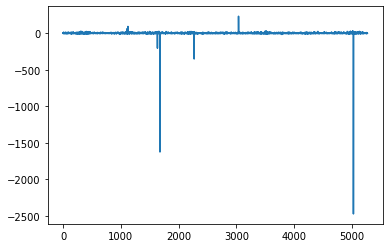

In [149]:
plt.plot(F_Nm[:,1])

In [178]:
a = np.unique(np.concatenate(
                    (
                    np.where(F_Nm[:,0]>200)[0], 
                    np.where(F_Nm[:,0]<-100)[0],
                    np.where(F_Nm[:,1]<-200)[0],
                    np.where(F_Nm[:,1]>50)[0],
                    np.where(F_Nm[:,2]<-20)[0],
                    np.where(F_Nm[:,3]<-20)[0],
                    np.where(F_Nm[:,3]>20)[0],
                    )))

In [224]:
a = a.astype(int)

In [247]:
a

array([ 157,  287,  298,  300,  310,  324,  351,  400,  403,  446,  534,
        684,  786, 1083, 1101, 1105, 1112, 1123, 1170, 1173, 1180, 1386,
       1574, 1603, 1615, 1634, 1639, 1649, 1659, 1678, 1727, 1784, 1992,
       2067, 2191, 2216, 2226, 2255, 2259, 2270, 2420, 2601, 2656, 2722,
       2825, 3038, 3187, 3320, 3331, 3427, 3490, 3500, 3503, 3509, 3516,
       3521, 3536, 3547, 3573, 3581, 3600, 3695, 3788, 4093, 4411, 4924,
       4938, 4964, 4975, 5012, 5017, 5027, 5046, 5135])

In [240]:
len(cip2)

5270

In [242]:
cip2[list(a)]

TypeError: list indices must be integers or slices, not list

In [260]:
c = [cip2[index][-23:-8] for index in a]

##### with open('excpath', "w") as f:
    for element in exception_list:
        f.write(element + "\n")

In [269]:
with open('598_exceptions.txt', "w") as f:
    for element in c:
        f.write(element + "\n")

In [261]:
c

['1484746/1496708',
 '1484753/1499926',
 '1484753/1499888',
 '1484753/1499857',
 '1484753/1499876',
 '1484753/1499941',
 '1484753/1499858',
 '1484758/1500505',
 '1484758/1500518',
 '1484758/1500517',
 '1484717/1492020',
 '1484733/1494044',
 '1484740/1494895',
 '1484757/1500366',
 '1484757/1500375',
 '1484757/1500472',
 '1484757/1500439',
 '1484757/1500409',
 '1484757/1500378',
 '1484757/1500434',
 '1484757/1500435',
 '1484744/1496403',
 '1484756/1500326',
 '1484756/1500329',
 '1484756/1500334',
 '1484756/1500332',
 '1484756/1500278',
 '1484756/1500264',
 '1484756/1500255',
 '1484722/1492640',
 '1484722/1492651',
 '1484722/1492687',
 '1484739/1494723',
 '1484750/1499535',
 '1484755/1500079',
 '1484755/1500084',
 '1484755/1500207',
 '1484755/1500165',
 '1484755/1500159',
 '1484755/1500137',
 '1484719/1492354',
 '1484726/1493113',
 '1484738/1494603',
 '1484738/1494622',
 '1484720/1492389',
 '1484725/1493000',
 '1484732/1493964',
 '1484737/1494472',
 '1484737/1494534',
 '1484749/1499418',


In [259]:
c[0][-23:-8]

'1484746/1496708'

In [246]:
len(c)

74

In [226]:
mask_array = np.zeros(F_Nm.shape[0], dtype=int)

mask_array[a] = 1
mask2 = np.repeat(mask_array,F_Nm.shape[1])

In [181]:
import numpy.ma as ma

In [227]:
mx = ma.masked_array(F_Nm, mask=mask2)

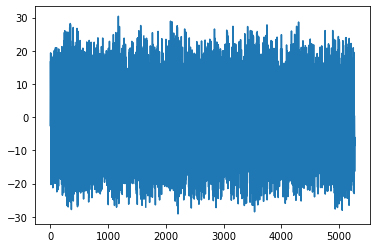

In [228]:
plt.plot(mx[:,7])

In [204]:
np.where(np.abs(F_Nm[:,i] - np.mean(F_Nm[:,i])) > 4 * np.std(F_Nm[:,i]))[0]

array([1678, 2270, 3038, 5027])

In [219]:
a = []
for i in range(441):
    a = np.concatenate((a,np.where(abs(F_Nm[:,i] - np.mean(F_Nm[:,i])) > 6 * np.std(F_Nm[:,i]))[0]))

In [220]:
a = np.unique(a)

In [221]:
a.shape

(74,)

<ipython-input-235-bd682b2368c0>:1: RuntimeWarning: invalid value encountered in log10
  plt.plot(np.log10(F_Nm[:,0]))


Text(0, 0.5, 'log10(F_N[0] amplitude)')

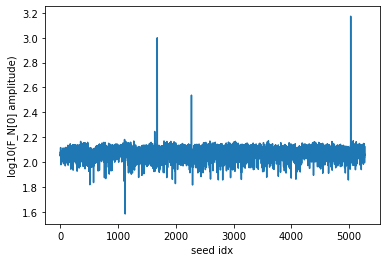

In [235]:
plt.plot(np.log10(F_Nm[:,0]))
plt.xlabel('seed idx')
plt.ylabel('log10(F_N[0] amplitude)')

(-100.0, 1500.0)

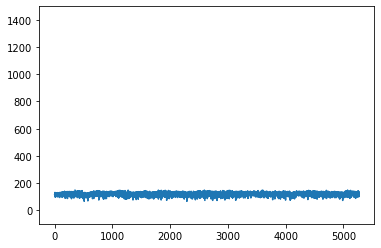

In [232]:
plt.plot(mx[:,0])
plt.ylim(-100,1500)

In [ ]:
for i in range(441):
    plt.figure(i)
    plt.plot(mx[:,i])
    plt.title(str(i))

In [ ]:
F_Nm

In [ ]:
for i in range(441):
    

In [236]:
mainpath = '/p/home/jusers/cherepashkin1/jureca/cherepashkin1/phenoseed/598' 
cip = []
i=0
for root, directories, filenames in os.walk(mainpath): 
    for filename in filenames:
        if '1492640_Surface' in filename:
            cip.append(os.path.join(root,filename))

In [237]:
cip[]

['/p/home/jusers/cherepashkin1/jureca/cherepashkin1/phenoseed/598/1484722/1492640_Surface.ply']

In [ ]:
df = 

In [250]:
import pandas as pd

In [252]:
df = pd.read_csv('/p/home/jusers/cherepashkin1/jureca/cherepashkin1/phenoseed_csv/pathes_to: 598.csv')

In [263]:
df

,file_name,zero_angle
0,598csv/1484720/1492412,7
1,598csv/1484719/1492243,14
2,598csv/1484738/1494635,13
3,598csv/1484755/1500157,6
4,598csv/1484738/1494634,8
...,...,...
5265,598csv/1484734/1494120,23
5266,598csv/1484719/1492267,13
5267,598csv/1484756/1500240,20
5268,598csv/1484752/1499783,24


In [264]:
for st in c:
    df = df[~df.file_name.str.contains(st)]

In [265]:
len(df)

5196

In [266]:
5270-5196

74

In [2]:
with open('/p/home/jusers/cherepashkin1/jureca/cherepashkin1/phenoseed_csv/598_exceptions.txt','r') as f:
    exc = f.readlines()

In [6]:
exc = [exc[i].replace('\n','') for i in range(len(exc))]

In [7]:
exc

['1484746/1496708',
 '1484753/1499926',
 '1484753/1499888',
 '1484753/1499857',
 '1484753/1499876',
 '1484753/1499941',
 '1484753/1499858',
 '1484758/1500505',
 '1484758/1500518',
 '1484758/1500517',
 '1484717/1492020',
 '1484733/1494044',
 '1484740/1494895',
 '1484757/1500366',
 '1484757/1500375',
 '1484757/1500472',
 '1484757/1500439',
 '1484757/1500409',
 '1484757/1500378',
 '1484757/1500434',
 '1484757/1500435',
 '1484744/1496403',
 '1484756/1500326',
 '1484756/1500329',
 '1484756/1500334',
 '1484756/1500332',
 '1484756/1500278',
 '1484756/1500264',
 '1484756/1500255',
 '1484722/1492640',
 '1484722/1492651',
 '1484722/1492687',
 '1484739/1494723',
 '1484750/1499535',
 '1484755/1500079',
 '1484755/1500084',
 '1484755/1500207',
 '1484755/1500165',
 '1484755/1500159',
 '1484755/1500137',
 '1484719/1492354',
 '1484726/1493113',
 '1484738/1494603',
 '1484738/1494622',
 '1484720/1492389',
 '1484725/1493000',
 '1484732/1493964',
 '1484737/1494472',
 '1484737/1494534',
 '1484749/1499418',


In [12]:
mainpath = '/p/home/jusers/cherepashkin1/jureca/cherepashkin1/phenoseed_csv/598csv10' 
cip = []
i=0
for root, directories, filenames in os.walk(mainpath): 
    for filename in filenames:
        if 'F_N.csv' in filename:
            cip.append(os.path.join(root,filename))

In [14]:
cip2 = []
j=0
F_Nm = np.zeros([len(cip)-len(exc),441])
for i in range(len(cip)):
    if not any(exception in cip[i] for exception in exc):
        F_Nm[j,:] = np.genfromtxt(cip[i],delimiter=',')
        cip2.append(cip[i])
        j+=1

In [15]:
F_Nm.shape

(5196, 441)

In [19]:
F_N = np.mean(F_Nm,axis=0)

In [22]:
np.savetxt('mean norm F_N.csv',F_N)

In [5]:
#Y_Nm = np.genfromtxt('/p/home/jusers/cherepashkin1/jureca/cherepashkin1/phenoseed_csv/Y_N_500.csv',delimiter=',')
dirs = np.genfromtxt('/p/home/jusers/cherepashkin1/jureca/cherepashkin1/phenoseed_csv/bX_500.csv',delimiter=',')

In [1]:
import torch

In [6]:
dirs = torch.Tensor(dirs)

In [7]:
dirsm = dirs[:2, :].repeat(40, 1, 1)

In [8]:
dirsm.shape

torch.Size([40, 2, 500])

In [27]:
dirs.shape

(72, 500)

In [28]:
dirs0 = dirs[:2,:]

In [24]:
Y_N = Y_Nm[:500,:]

In [25]:
Y_N.shape

(500, 441)

In [29]:
dirs0.shape

(2, 500)

In [34]:
dirs0 = dirs0.transpose()

In [35]:
dirs0.shape

(500, 2)

In [33]:
F.shape

(500,)

In [42]:
F_Nm.shape

(5196, 441)

In [46]:
F_Nm.shape[0]

5196

In [44]:
p1 = np.zeros([500,3])
for j in range(F_Nm.shape[0]):
    F = np.matmul(Y_N,F_Nm[j,:])
    p = np.zeros([3,500])
    p[0,:] = F*np.cos(dirs0[:,0])*np.sin(dirs0[:,1])
    p[1,:] = F*np.sin(dirs0[:,0])*np.sin(dirs0[:,1])
    p[2,:] = F*np.cos(dirs0[:,1])
    p = p.transpose()
    p1 = p1 + p

In [47]:
p1 = p1/F_Nm.shape[0]

In [39]:
p = p.transpose()

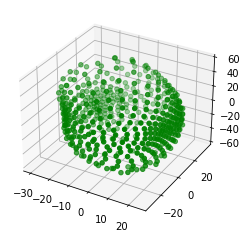

In [41]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(p[:,0],p[:,1],p[:,2], c='g')

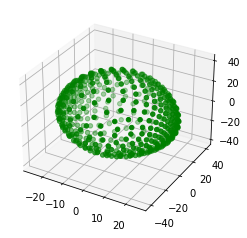

In [48]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(p1[:,0],p1[:,1],p1[:,2], c='g')

In [9]:
os.getcwd()

'/p/home/jusers/cherepashkin1/jureca/circles/finetune_test'

In [10]:
import shutil 

In [19]:
mainpath = '/p/home/jusers/cherepashkin1/jureca/seed2sh/598/' 
cip = []
i=0
for root, directories, filenames in os.walk(mainpath): 
    if root.count('/')==9:
#         print(root)
        cip.append(root)
#     for filename in filenames:
#         print(os.path.join(root,filename))
#         if 'Surface.ply' in filename:
#             cip.append(os.path.join(root,filename))

In [20]:
len(cip)

5283

In [29]:
cip.sort()

In [30]:
cip

['/p/home/jusers/cherepashkin1/jureca/seed2sh/598/1484717/1491988',
 '/p/home/jusers/cherepashkin1/jureca/seed2sh/598/1484717/1491989',
 '/p/home/jusers/cherepashkin1/jureca/seed2sh/598/1484717/1491990',
 '/p/home/jusers/cherepashkin1/jureca/seed2sh/598/1484717/1491991',
 '/p/home/jusers/cherepashkin1/jureca/seed2sh/598/1484717/1491992',
 '/p/home/jusers/cherepashkin1/jureca/seed2sh/598/1484717/1491993',
 '/p/home/jusers/cherepashkin1/jureca/seed2sh/598/1484717/1491994',
 '/p/home/jusers/cherepashkin1/jureca/seed2sh/598/1484717/1491995',
 '/p/home/jusers/cherepashkin1/jureca/seed2sh/598/1484717/1491996',
 '/p/home/jusers/cherepashkin1/jureca/seed2sh/598/1484717/1491997',
 '/p/home/jusers/cherepashkin1/jureca/seed2sh/598/1484717/1491998',
 '/p/home/jusers/cherepashkin1/jureca/seed2sh/598/1484717/1491999',
 '/p/home/jusers/cherepashkin1/jureca/seed2sh/598/1484717/1492000',
 '/p/home/jusers/cherepashkin1/jureca/seed2sh/598/1484717/1492001',
 '/p/home/jusers/cherepashkin1/jureca/seed2sh/59

In [24]:
cip[0]

'/p/home/jusers/cherepashkin1/jureca/seed2sh/598/1484741/1495117'

In [23]:
cip[0].split('/')[-1]

'1495117'

In [33]:
for i in range(100):
#     shutil.copy('/p/home/jusers/cherepashkin1/jureca/seed2sh/rotation_000.tif',os.path.join(cip[i],'rotation_000.tif'))
    shutil.copy('/p/home/jusers/cherepashkin1/jureca/seed2sh/1491988_F_N.csv',os.path.join(cip[i].replace('598','598csv')[:-7],cip[i].split('/')[-1]+'_F_N.csv'))

In [26]:
os.path.join(cip[i],'rotation_000.tif')

'/p/home/jusers/cherepashkin1/jureca/seed2sh/598/1484741/1495130/rotation_000.tif'

In [32]:
cip[i].replace('598','598csv')[:-7]

'/p/home/jusers/cherepashkin1/jureca/seed2sh/598csv/1484717/'

In [34]:
import pandas as pd

In [36]:
df = pd.read_csv('/p/home/jusers/cherepashkin1/jureca/cherepashkin1/phenoseed_csv/pathes_to: 598.csv')

In [37]:
df = df.sort_values(by=['file_name'])

In [39]:
df.to_csv('/p/home/jusers/cherepashkin1/jureca/seed2sh/pathes_to: 598.csv', index=False)

In [41]:
__file__

/usr/bin/sh: __file__: command not found


In [43]:
df[:100]

,file_name,zero_angle
5105,598csv/1484717/1491988,8
1665,598csv/1484717/1491989,9
4250,598csv/1484717/1491990,8
4993,598csv/1484717/1491991,5
3386,598csv/1484717/1491992,11
...,...,...
1178,598csv/1484717/1492083,9
3570,598csv/1484717/1492084,9
5240,598csv/1484717/1492085,2
364,598csv/1484717/1492087,8


In [4]:
import h5py
import numpy as np

In [5]:
F_Nw = np.array(h5py.File('C:/cherepashkin1/phenoseed_csv/598csv11_F_N.h5','r').get('dataset'))

In [6]:
F_Nw.shape

(5270, 441)

In [7]:
with open('C:/circles/finetune_test/598_exceptions.txt', "r") as f:
    exception_list = f.readlines()

In [8]:
with open('C:/cherepashkin1/phenoseed_csv/598csv11_F_N_file_names.txt', "r") as f:
    filen = f.readlines()

In [13]:
exception_list[0]

'1484755/1500207\n'

In [14]:
filen[0]

'1484717_1491988\n'

In [17]:
cip2 = filen
for e in exception_list:
    cip2 = [ x for x in cip2 if e.replace('/', '_') not in x ]

In [19]:
len(filen)

5270

In [18]:
len(cip2)

5193

In [20]:
cip2[0]

'1484717_1491988\n'

In [11]:
indices = []
for pathes in filen:
    pathl = [path.replace('598csv11/','').replace('/','_') for path in pathes]
    # print(pathl)
    for path in pathl:
        indices.append([i for i, s in\
         enumerate(filen) if path in s][0])
# print(indices)
f_n = F_Nw[indices,:]

KeyboardInterrupt: 

In [ ]:

for path in pathl:
    

In [26]:
idx = []
for i in cip2:
    idx.append()

In [29]:
idx = [filen.index(i) for i in cip2]

In [28]:
len(idx)

5193

In [30]:
F_N = F_Nw[idx,:]

In [31]:
F_N.shape

(5193, 441)

In [33]:
np.mean(F_N,axis=1).shape

(5193,)

In [34]:
import matplotlib.pyplot as plt

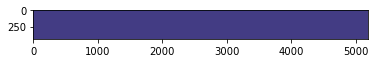

In [40]:
plt.imshow(F_N2)

In [39]:
F_N2 = (F_N.transpose() - np.mean(F_N.transpose(),axis=0))/np.std(F_N.transpose(),axis=0)

In [62]:
np.expand_dims(np.mean(F_N,axis=1),axis=0).shape

(1, 5193)

In [64]:
F_N.shape[1]

441

In [78]:
np.expand_dims(np.mean(F_N,axis=0),axis=0).shape

(1, 441)

In [85]:
np.repeat(np.expand_dims(np.mean(F_N,axis=0),axis=1),F_N.shape[0],axis=1).shape

(441, 5193)

In [86]:
meanv = np.repeat(np.expand_dims(np.mean(F_N,axis=0),axis=1),F_N.shape[0],axis=1)
stdv = np.repeat(np.expand_dims(np.std(F_N,axis=0),axis=1),F_N.shape[0],axis=1)

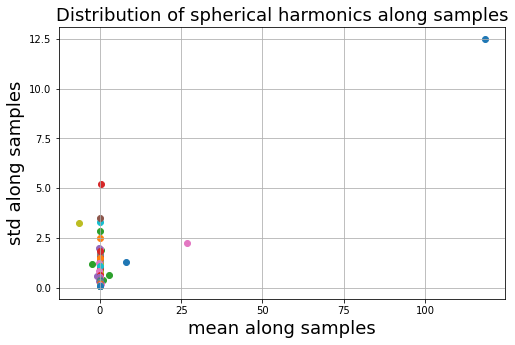

In [148]:
fig = plt.figure(figsize=(8,5))
for i in range(441):
    plt.scatter(np.mean(F_N,axis=0)[i],np.std(F_N,axis=0)[i])
plt.title('Distribution of spherical harmonics along samples', fontsize = 18)
# plt.xlim([-7,10])
plt.grid()
plt.locator_params(axis="x", nbins=6)
plt.locator_params(axis="y", nbins=6)
plt.xlabel('mean along samples', fontsize=18)
plt.ylabel('std along samples', fontsize=18)
plt.savefig('mean_std_scatter.pdf')
plt.savefig('mean_std_scatter.png')

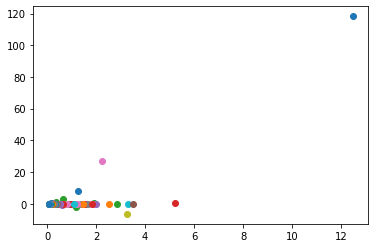

In [129]:
fig

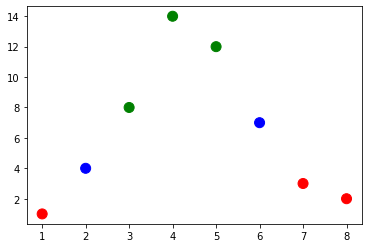

In [125]:
a = np.array([[ 1, 2, 3, 4, 5, 6, 7, 8 ],
              [ 1, 4, 8, 14, 12, 7, 3, 2 ]])

categories = np.array([0, 2, 1, 1, 1, 2, 0, 0])

colormap = np.array(['r', 'g', 'b'])

plt.scatter(a[0], a[1], s=100, c=colormap[categories])

In [81]:
F_N.shape

(5193, 441)

In [87]:
F_N2 = (F_N.transpose() - meanv)/stdv

In [88]:
F_N2.shape

(441, 5193)

In [89]:
np.mean(F_N2[0,:])

1.6780466226385268e-14

In [90]:
np.std(F_N2[0,:])

0.9999999999999989

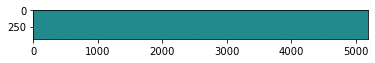

In [91]:
plt.imshow(F_N2)

In [45]:
x = F_N[:,0]

In [49]:
x2 = (x - np.mean(x))/np.std(x)

In [50]:
np.mean(x2)

-1.4284741308175324e-15

In [52]:
np.std(x2)

1.0

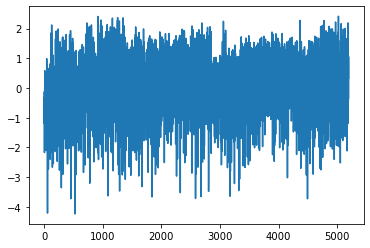

In [54]:
plt.plot(x2)

In [96]:
F_N.shape

(5193, 441)

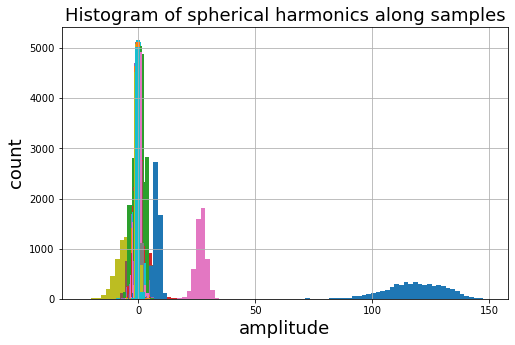

In [149]:
fit = plt.figure(figsize=(8, 5))
for i in range(0,100):
    data = F_N[:,i]
    binwidth = 2
    _ = plt.hist(data,bins=np.arange(min(data), max(data) + binwidth, binwidth))
plt.title('Histogram of spherical harmonics along samples', fontsize = 18)
# plt.xlim([-7,10])
plt.xlabel('amplitude', fontsize=18)
plt.ylabel('count', fontsize=18)
plt.grid()
plt.locator_params(axis="x", nbins=6)
plt.locator_params(axis="y", nbins=6)
plt.savefig('mean_seed_hist.pdf')
plt.savefig('mean_seed_hist.png')
#     plt.xlim([-15,15])

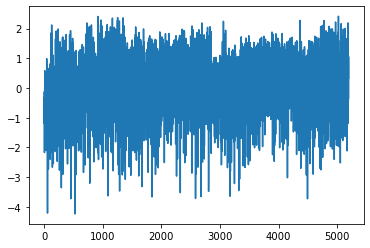

In [92]:
plt.plot(F_N2[0,:])

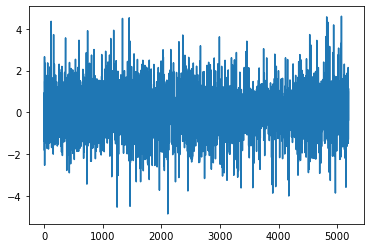

In [93]:
plt.plot(F_N2[1,:])

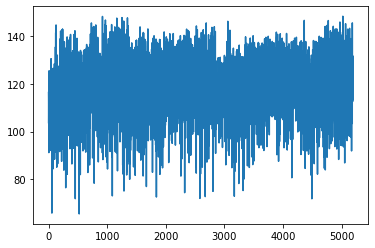

In [44]:
plt.plot(F_N[:,0])

In [24]:
filen[0]

'1484717_1491988\n'

In [25]:
cip2[0]

'1484717_1491988\n'

In [23]:
idx

0

In [ ]:
indices = []
indices.append([i for i, s in enumerate(cip2) if path in s][0])

In [151]:
from sklearn.decomposition import PCA

In [160]:
pca = PCA(n_components=2)
pcv = pca.fit_transform(F_N2.transpose())

In [161]:
pcv.shape

(5193, 2)

In [162]:
pcv[0]

array([1.15987841, 5.33868606])

In [167]:
np.std(F_N2[0])

0.9999999999999989

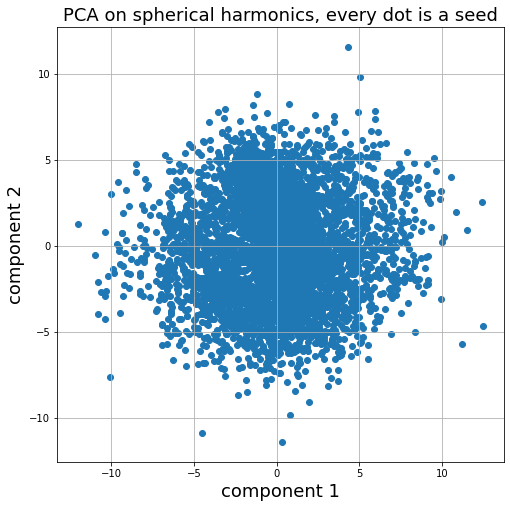

In [171]:
fit = plt.figure(figsize=(8, 8))
plt.scatter(pcv[:,0],pcv[:,1])
plt.title('PCA on spherical harmonics, every dot is a seed', fontsize = 18)
# plt.xlim([-7,10])
plt.xlabel('component 1', fontsize=18)
plt.ylabel('component 2', fontsize=18)
plt.grid()
plt.locator_params(axis="x", nbins=6)
plt.locator_params(axis="y", nbins=6)
plt.savefig('mean_seed_pca.pdf')
plt.savefig('mean_seed_pca.png')